1.

a) The aim of the authors is to train a classification model which can be used to predict whether certain cancer cells are benign or malignant.

b) The authors first collected cell samples from 569 patients, and used these samples to identify features of the nuclei. Next, they created a prediction model using machine learning algorithms and logistic regression. The model was then validated using cross-validation and accuracy was determined using 10-fold cross-validation.

c) The accuracy of classification was determined using 10-fold cross-validation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv('C:\\Users\\steve\\Desktop\\python\\datasets\wdbcdata.csv')
#remove extra column
df.drop(['Unnamed: 32'],axis=1,inplace=True)

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Analysis using histograms

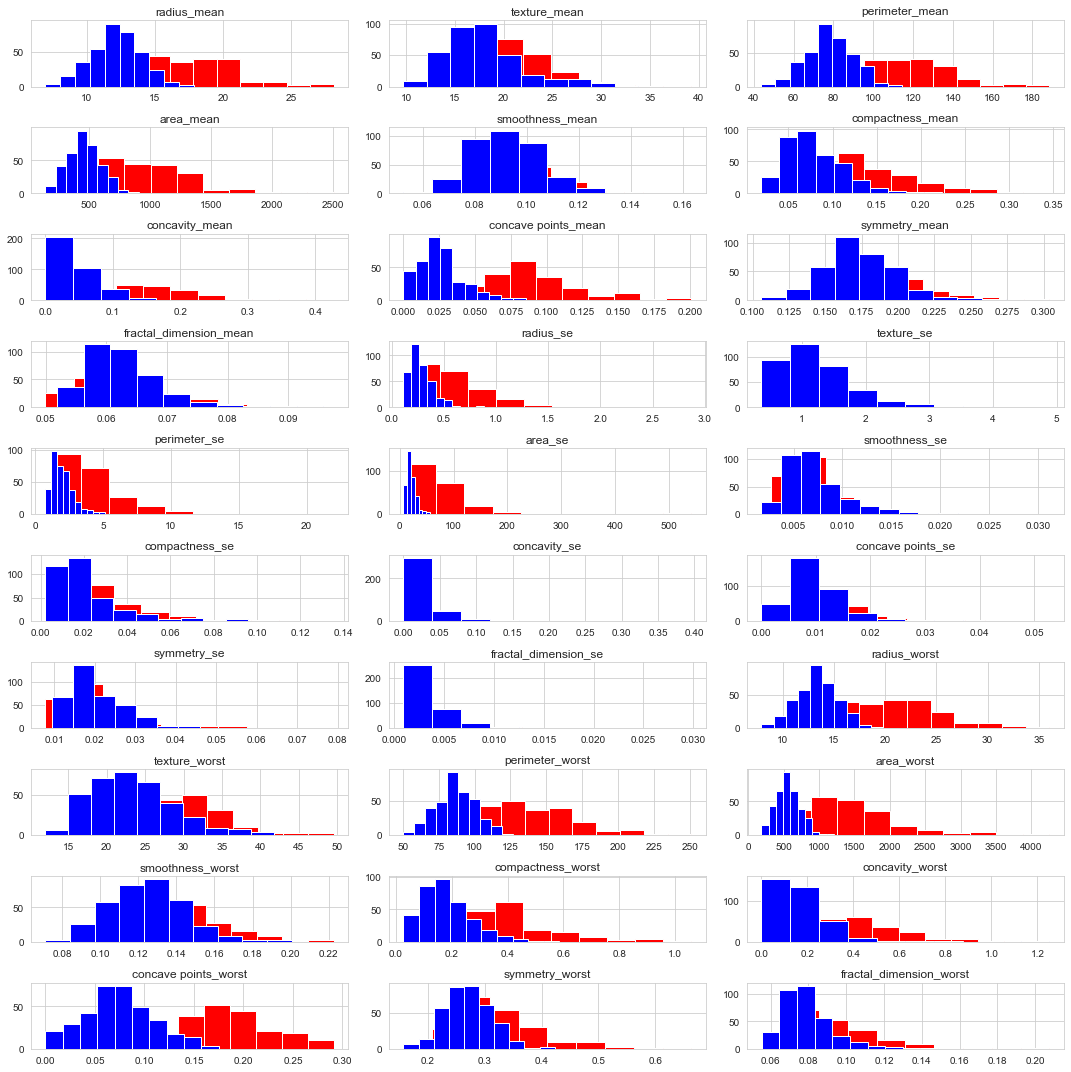

In [7]:
plt.figure(figsize=(15,15));
j=1
for i in cols:
        plt.subplot(10,3,j)
        plt.hist(x=df[df['diagnosis']=='M'][i],color='red');
        plt.hist(x=df[df['diagnosis']=='B'][i],color='blue');
        plt.title(i)
        j=j+1  
plt.tight_layout()

## Observations from histogram
The mean values of radius, perimeter, area, concavity and concave points are greater for malignant cells, and smaller for benign cells.

* <font color='green'>*For instance, when mean radius is greater than 15, the cells tend to be malignant.*
* Similarly, when mean perimeter is greater than 100, the cells tend to be malignant.

<font color='black'>The standard error values of radius, perimeter and area are greater for malignant cells, and smaller for benign cells.

* <font color='green'>*For instance, when area_se > 100, cells tend to be malignant.*
* Similarly, when radius_se>0.5, the cells tend to be malignant.

<font color='black'>The worst values of radius, perimeter, area and concave points are greater for malignant cells, and smaller for benign cells.

* <font color='green'>*For instance, when area_worst > 1000, cells tend to be malignant.*
* Similarly, when compactness_worst>0.4, the cells tend to be malignant.

## Convert M and B to 1 and 0

In [8]:
def diag(diag_val):
    if diag_val=='M':
        return 1
    else:
        return 0
df['diagnosis']=df['diagnosis'].apply(diag)

## Split into X and Y

In [9]:
X=df[cols]
y=df['diagnosis']

## Normalizing attributes

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

## Split into train and test data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=8)

## KNN Algorithm with k=1

In [12]:
from sklearn.neighbors import KNeighborsClassifier
kn1=KNeighborsClassifier(n_neighbors=1)
kn1.fit(X_train,y_train)
y1pred=kn1.predict(X_test)
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score
score1=cross_val_score(kn1, X_train, y_train, cv = 10, scoring = 'accuracy')
print("F1 Score: ",f1_score(y_test,y1pred))
print("Accuracy: ",accuracy_score(y_test,y1pred))
print('Misclassification Error:\n', 1-score1)

F1 Score:  0.9459459459459459
Accuracy:  0.9534883720930233
Misclassification Error:
 [0.12244898 0.04081633 0.02040816 0.0625     0.02083333 0.
 0.08333333 0.         0.02083333 0.0625    ]


## KNN Algorithm with k=3

In [13]:
kn3=KNeighborsClassifier(n_neighbors=3)
kn3.fit(X_train,y_train)
y3pred=kn3.predict(X_test)
score3=cross_val_score(kn3, X_train, y_train, cv = 10, scoring = 'accuracy')
print("F1 Score: ",f1_score(y_test,y3pred))
print("Accuracy: ",accuracy_score(y_test,y3pred))
print('Misclassification Error:\n', 1-score3)

F1 Score:  0.9863013698630138
Accuracy:  0.9883720930232558
Misclassification Error:
 [0.06122449 0.02040816 0.         0.08333333 0.02083333 0.02083333
 0.02083333 0.04166667 0.04166667 0.04166667]


<font color='green'>*As we vary the train and test datasets, the score metrics vary, but general observation is that accuracy and f1 score are higher, while error is lower when k=3.*

# Fisher’s Linear Discriminant Analysis

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
y_lda_pred=lda.predict(X_test)
print("F1 Score: ",f1_score(y_test,y_lda_pred))
print("Accuracy: ",accuracy_score(y_test,y_lda_pred))
score_lda=cross_val_score(lda, X_train, y_train, cv = 10, scoring = 'accuracy')
print('Misclassification Error:\n', 1-score_lda)

F1 Score:  0.9722222222222222
Accuracy:  0.9767441860465116
Misclassification Error:
 [0.10204082 0.         0.06122449 0.0625     0.         0.02083333
 0.0625     0.04166667 0.08333333 0.0625    ]


<font color='green'>*As we vary the train and test datasets, the score metrics vary, but general observation is that the score metrics of LDA and KNN for k=3, are quite similar.*